# Predicting Students' Dropout and Academic Success

This project aims to predict student dropout rates and academic success using various machine learning techniques. The dataset used for this analysis is sourced from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success).

## Project Outline

1. **Download and Load the Data:**
   - Download the dataset and load it into a Pandas DataFrame.

2. **Explore and Preprocess the Data:**
   - Understand the features and target variable.
   - Handle missing values and outliers.
   - Encode categorical variables.
   - Normalize/standardize numerical features.
   
   Please click this link to access:[EDA Notebook](./Predict_Students_Dropout_EDA.ipynb).

3. **Split the Data:**
   - Split the dataset into training and testing sets.

4. **Build Classification Models:**
   - Train multiple classification models such as Logistic Regression, Random Forest, and SVM.
   - Evaluate their performance using metrics like accuracy, precision, recall, and F1-score.

   - Create Pipeline: Create a pipeline that includes data scaling and the Random Forest classifier.
   - Train the Model: Fit the pipeline to the training data.
   -  Evaluate the Model: Predict on training and testing data, calculate accuracy, and print the classification report and confusion matrix.

5. **Feature Selection and Hyperparameter Tuning:**
   - Perform feature selection to identify important features.
   - Tune hyperparameters using Grid Search or Random Search.

6. **Evaluate and Compare Models:**
   - Compare the models based on their performance metrics.
   - Choose the best-performing model.

7. **Model Interpretation and Insights:**
   - Interpret the model to understand which features are most influential.
   - Provide insights and recommendations based on the findings.

In [451]:
""" install the required package to fetch the dataset for this project
from the UCI Machine Learning Repository """

#%pip install ucimlrepo
#%pip install xgboost
#%pip install cmake
#%pip install catboost

' install the required package to fetch the dataset for this project\nfrom the UCI Machine Learning Repository\xa0'

In [452]:
#Import required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score



In [453]:
# Load the dataset
df = pd.read_csv('data/prep_data.csv')

### Data Modelling¶

Converting Target Variable into Numeric Form
To predict students' academic success and dropout, we will use logistic regression to determine the target variable using the feature variables. Since the target data contains students who are still enrolled, we will drop them from the dataset and use the data for student who dropped out and graduated. Then, we will transform the target variable into numeric form using label encoder, a data preprocessing feature from SciKit library. The labels dropout and graduate become 0 and 1, respectively.

In [456]:
# Check encoding worked on target column
df_student['Target'].value_counts()


Target
1    2209
0    1421
Name: count, dtype: int64

In [457]:
df_student.head()


,Marital_Status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_(grade),Nationality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Target,age_admission_ratio
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,0,-0.462655
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,1,-0.002746
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,0,0.101311
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,1,0.030682
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,1,0.079806


#### Splitting Features and Target Variables into X and Y
We set X and Y as the dataframe feature and target variables, respectively. Note that we will drop the Nationality and International columns since they are highly correlated and only one nationality significantly dominates the data. This will prevent bias in the statistical regression.

In [458]:
# Set target variable as X and the remaining variables except Nationality and International as Y
Y = df_student['Target']
X = df_student.drop(columns=['Nationality','International','Target'], axis=1)

In [459]:
display(X, X.shape)

,Marital_Status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_(grade),Mothers_qualification,Fathers_qualification,Mothers_occupation,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,age_admission_ratio
0,1,17,5,171,1,1,122.0,19,12,5,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,-0.462655
1,1,15,1,9254,1,1,160.0,1,3,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,-0.002746
2,1,1,5,9070,1,1,122.0,37,37,9,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0.101311
3,1,17,2,9773,1,1,122.0,38,37,5,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0.030682
4,2,39,1,8014,0,1,100.0,37,38,9,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0.079806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,5,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,0.051657
4420,1,1,2,9773,1,1,120.0,1,1,9,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0.040813
4421,1,1,1,9500,1,1,154.0,37,37,9,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0.023994
4422,1,1,1,9147,1,1,180.0,37,37,7,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,0.004386


(3630, 35)

#### Splitting Data into Training and Testing Data
To begin with the logistic regression as our machine learning model, we split the data into training and testing data. 80% of the data will be our training model and rest 20% will be the testing model. We choose the third state of the random sampling.

In [460]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [461]:
print(X.shape, X_train.shape, X_test.shape)

(3630, 35) (2904, 35) (726, 35)


#### Logistic Regression
Logistic regression will now be implemented using Extreme Gradient Boosting (XGBoost) which is one of the available open source libraries used for regression models. In this case, binary logistic is set for our model with 1000 n_estimators. The n_estimators serves as the number of decision trees or classification considering the data from feature variables.

In [429]:
bin_log = xgb.XGBClassifier(objective='binary:logistic', n_estimators=1000)
bin_log.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### Data Prediction and Evaluation of the Model
We now set the logistic regression model to the training data.

In [430]:
data_accuracy = accuracy_score(y_test, target_prediction)
print("Accuracy:", data_accuracy)

Accuracy: 0.8953168044077136


In [431]:
# Extract the row as a Series
row_series = X.iloc[193]

# Convert the Series to a list
input_list = row_series.tolist()

# Convert the list to a tuple
input_data = tuple(input_list)

In [432]:
# Print the tuple
print(input_data)

(1.0, 1.0, 1.0, 9254.0, 1.0, 1.0, 123.0, 1.0, 37.0, 9.0, 9.0, 0.3537121484538041, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, -0.2985576917271262, 0.0, 6.0, 9.0, 5.0, 11.0, 0.0, 0.0, 6.0, 8.0, 5.0, 12.0, 0.0, 15.5, 2.8, -4.06, -0.0105498529888643)


In [433]:
# The input data is the 192nd record in the student_data dataset disregarding the Nationality and International record

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = bin_log.predict(input_data_reshaped)
print(prediction)
print("The initial value is ",prediction[0])

[1]
The initial value is  1


In [434]:
# For reference
print(df_student['Target'].iloc[193])

1


In [435]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(max_iter=1000)
logisticRegr_model=logisticRegr.fit(X_train, y_train)
print(logisticRegr_model)

LogisticRegression(max_iter=1000)


/Users/youssef/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [436]:
model = logisticRegr_model
modellr=model.fit(X_train, y_train)
#Evaluate for traing Dataset
train_lr_boost=modellr.score(X_train, y_train)*100
#Evaluate for test dataset
test_lr_boost=modellr.score(X_test,y_test)*100
print('Accuracy of Train=',train_lr_boost)
print('Accuracy of Test=',test_lr_boost)

Accuracy of Train= 90.633608815427
Accuracy of Test= 89.6694214876033


/Users/youssef/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Try a Different Solver


Logistic Regression in scikit-learn supports different solvers. You can try using saga, liblinear, or other solvers. Here’s how to specify the solver:


In [437]:

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(max_iter=5000, solver='lbfgs') # solver='saga' is used to handle large datasets
logisticRegr_model=logisticRegr.fit(X_train, y_train)
print(logisticRegr_model)

"""Increase the number of iterations by setting the max_iter parameter in LogisticRegression:"""

LogisticRegression(max_iter=5000)


'Increase the number of iterations by setting the max_iter parameter in LogisticRegression:'

In [438]:
model = logisticRegr_model
modellr=model.fit(X_train, y_train)
#Evaluate for traing Dataset
train_lr_boost=modellr.score(X_train, y_train)*100
#Evaluate for test dataset
test_lr_boost=modellr.score(X_test,y_test)*100
print('Accuracy of Train=',train_lr_boost)
print('Accuracy of Test=',test_lr_boost)

Accuracy of Train= 91.59779614325069
Accuracy of Test= 90.22038567493112


## Random Forest General

In [439]:

# Create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=20)

In [440]:

# Fit the model on the training data
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=20)

In [441]:
# Evaluate performance on testing data
rf.score(X_test, y_test)

0.90633608815427

Training Accuracy : 1.0
Testing Accuracy : 0.90633608815427

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       290
           1       0.90      0.95      0.92       436

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726


CONFUSION MATRIX


<Axes: >

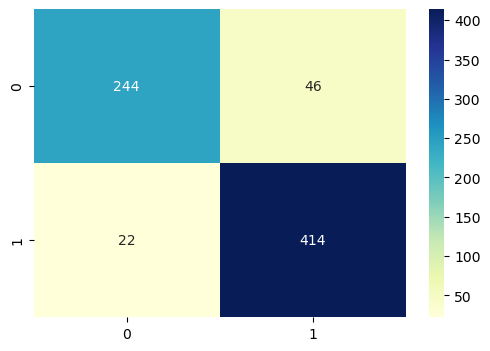

In [442]:

# Calculating the accuracy of the model
print('Training Accuracy :',rf.score(X_train,y_train))
print('Testing Accuracy :',rf.score(X_test,y_test))

# Make predictions on the test data
y_pred2 = rf.predict(X_test)

print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_test, y_pred2))

# calculating confusion matrix
cm = confusion_matrix(y_test, y_pred2)

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")

## Random Forest with xgboost Classifier

Create a Pipeline for Scaling and Random Forest

In [443]:
# Create a pipeline with StandardScaler and RandomForestClassifier
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('random_forest', RandomForestClassifier(random_state=42))
])

In [444]:
# Define the hyperparameters to tune
param_grid_rf = {
    'random_forest__n_estimators': [50, 100],  # Reduce number of trees
    'random_forest__max_depth': [None, 10, 20],
    'random_forest__min_samples_split': [2, 5],
    'random_forest__min_samples_leaf': [1, 2],
}

### Train the Model

In [445]:
# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('random_forest',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'random_forest__max_depth': [None, 10, 20],
                         'random_forest__min_samples_leaf': [1, 2],
                         'random_forest__min_samples_split': [2, 5],
                         'random_forest__n_estimators': [50, 100]},
             scoring='accuracy')

### Evaluate the Model

In [446]:
# Get the best model from the grid search
best_model_rf = grid_search_rf.best_estimator_

In [447]:
# Evaluate the model
y_train_pred_rf = best_model_rf.predict(X_train)
y_test_pred_rf = best_model_rf.predict(X_test)

# Calculate accuracy
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

# Print classification report
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred_rf))


# Print the best hyperparameters
print("\nBest Hyperparameters:")
print(grid_search_rf.best_params_)


print(f'Accuracy of Train= {train_accuracy * 100:.2f}%')
print(f'Accuracy of Test= {test_accuracy * 100:.2f}%')

# Print classification report
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

# Print confusion matrix
print("\nConfusion Matrix for Test Set:")
print(confusion_matrix(y_test, y_test_pred))


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       290
           1       0.88      0.96      0.92       436

    accuracy                           0.90       726
   macro avg       0.90      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726


Best Hyperparameters:
{'random_forest__max_depth': 10, 'random_forest__min_samples_leaf': 1, 'random_forest__min_samples_split': 5, 'random_forest__n_estimators': 50}
Accuracy of Train= 91.67%
Accuracy of Test= 90.63%

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.37      0.32      0.34       290
           1       0.58      0.63      0.60       436

    accuracy                           0.51       726
   macro avg       0.47      0.48      0.47       726
weighted avg       0.50      0.51      0.50       726


Confusion Matrix for Test Set:
[[ 94 196]
 [163 273]

### Generate and visualise confusion matrix

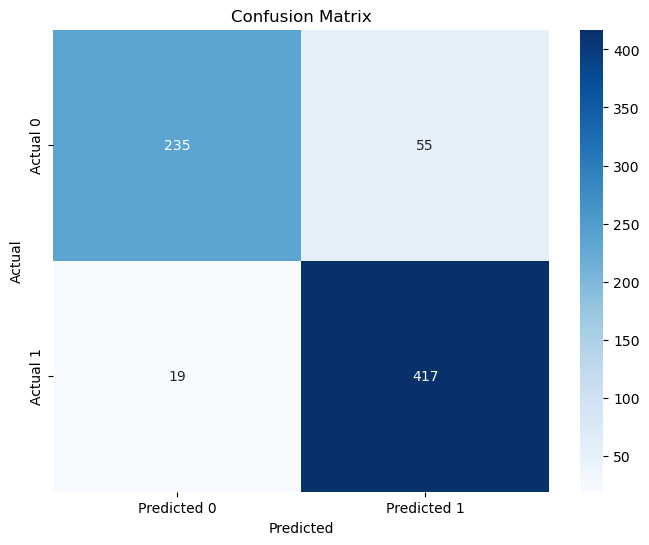

In [448]:
# Generate and visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Support Vector Machine


In [449]:
# Create a pipeline with StandardScaler and SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', VotingClassifier(random_state=42))
])

TypeError: VotingClassifier.__init__() got an unexpected keyword argument 'random_state'

In [ ]:
# Define the hyperparameters to tune
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [1, 0.1, 0.01, 0.001],
    'svc__kernel': ['linear', 'rbf']
}

In [ ]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10, 100],
                         'svc__gamma': [1, 0.1, 0.01, 0.001],
                         'svc__kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [ ]:
# Get the best model from the grid search
best_model_svc = grid_search.best_estimator_

In [ ]:
# Evaluate the model
y_train_pred = best_model_svc.predict(X_train)
y_test_pred = best_model_svc.predict(X_test)

In [ ]:
# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Accuracy of Train= {train_accuracy * 100:.2f}%')
print(f'Accuracy of Test= {test_accuracy * 100:.2f}%')

# Print classification report
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

Accuracy of Train= 91.67%
Accuracy of Test= 90.63%

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.94      0.82      0.88       290
           1       0.89      0.96      0.93       436

    accuracy                           0.91       726
   macro avg       0.91      0.89      0.90       726
weighted avg       0.91      0.91      0.91       726



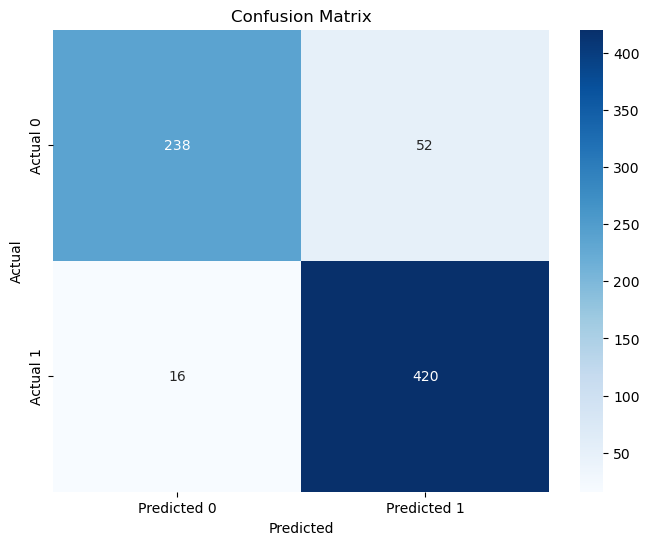


Best Hyperparameters:
{'svc__C': 0.1, 'svc__gamma': 1, 'svc__kernel': 'linear'}


In [ ]:
# Generate and visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the best hyperparameters
print("\nBest Hyperparameters:")
print(grid_search.best_params_)